In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.1


In [5]:
df=pd.read_csv("winequality-red.csv", delimiter = ";")

In [6]:
dataset = df.copy()

In [7]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
dataset.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

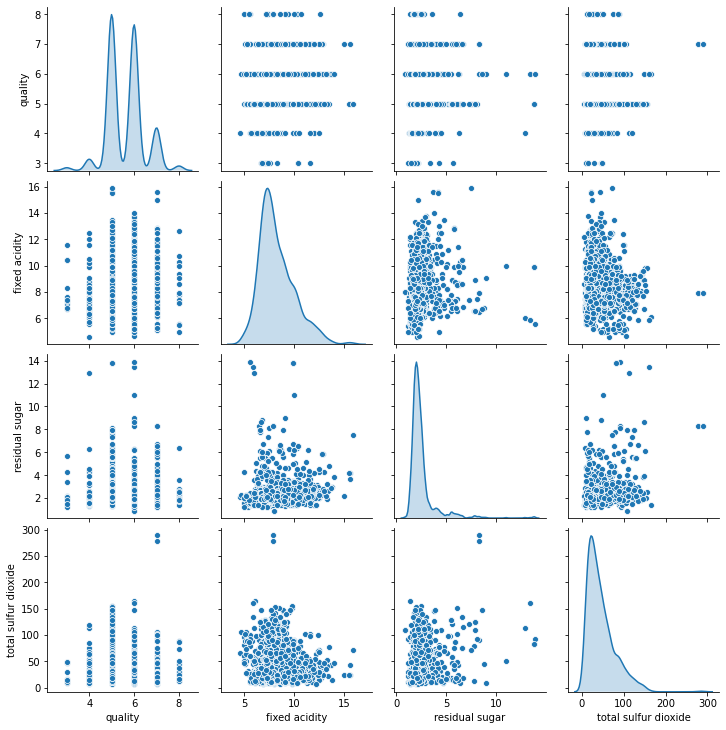

In [11]:
sns.pairplot(train_dataset[['quality', 'fixed acidity', 'residual sugar', 'total sulfur dioxide']], diag_kind='kde')

In [12]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1279.0,8.310164,1.744190,4.60000,7.1000,7.90000,9.250000,15.9000
volatile acidity,1279.0,0.525571,0.176645,0.12000,0.3900,0.52000,0.635000,1.5800
citric acid,1279.0,0.271618,0.196822,0.00000,0.0900,0.26000,0.430000,0.7900
residual sugar,1279.0,2.516341,1.300985,0.90000,1.9000,2.20000,2.600000,13.9000
chlorides,1279.0,0.087347,0.045666,0.01200,0.0710,0.07900,0.091000,0.6110
free sulfur dioxide,1279.0,15.868647,10.438880,1.00000,7.0000,14.00000,21.000000,72.0000
total sulfur dioxide,1279.0,46.488663,32.952841,6.00000,22.0000,38.00000,62.000000,289.0000
density,1279.0,0.996739,0.001888,0.99007,0.9956,0.99676,0.997855,1.0032
pH,1279.0,3.312588,0.153923,2.87000,3.2100,3.31000,3.400000,4.0100
sulphates,1279.0,0.655012,0.160192,0.33000,0.5500,0.62000,0.730000,1.9800


In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("quality")
test_labels = test_features.pop("quality")

In [15]:
normalizer = preprocessing.Normalization()

In [16]:
normalizer.adapt(np.array(train_features))

In [17]:
print(normalizer.mean.numpy())

[ 8.31   0.526  0.272  2.516  0.087 15.869 46.489  0.997  3.313  0.655
 10.436]


In [18]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [19]:
model = build_and_compile_model(normalizer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 13,336
Trainable params: 13,313
Non-trainable params: 23
___________________________________________________

In [21]:
%%time
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    epochs=500)

Epoch 1/500
32/32 [==============================] - 0s 5ms/step - loss: 4.2016 - val_loss: 2.1777
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 1.5214 - val_loss: 1.1518
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.9869 - val_loss: 0.9112
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8754 - val_loss: 0.8417
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.7905 - val_loss: 0.7824
Epoch 6/500
32/32 [==============================] - ETA: 0s - loss: 0.773 - 0s 1ms/step - loss: 0.7358 - val_loss: 0.7314
Epoch 7/500
32/32 [==============================] - ETA: 0s - loss: 0.760 - 0s 1ms/step - loss: 0.6627 - val_loss: 0.6705
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6078 - val_loss: 0.6452
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5754 - val_loss: 0.6072
Epoch 10/500
32/32 [==============================] - ETA: 0s

32/32 [==============================] - 0s 1ms/step - loss: 0.2308 - val_loss: 0.5359
Epoch 82/500
32/32 [==============================] - ETA: 0s - loss: 0.290 - 0s 1ms/step - loss: 0.2234 - val_loss: 0.5423
Epoch 83/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2202 - val_loss: 0.5481
Epoch 84/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2368 - val_loss: 0.5596
Epoch 85/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2335 - val_loss: 0.5548
Epoch 86/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2309 - val_loss: 0.5276
Epoch 87/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2258 - val_loss: 0.5485
Epoch 88/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2150 - val_loss: 0.5431
Epoch 89/500
32/32 [==============================] - ETA: 0s - loss: 0.212 - 0s 1ms/step - loss: 0.2062 - val_loss: 0.5334
Epoch 90/500
32/32 [==============================] - 0s 1ms/step

32/32 [==============================] - 0s 1ms/step - loss: 0.1442 - val_loss: 0.5393
Epoch 162/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1501 - val_loss: 0.5473
Epoch 163/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1702 - val_loss: 0.5662
Epoch 164/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1537 - val_loss: 0.5475
Epoch 165/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1647 - val_loss: 0.5346
Epoch 166/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1501 - val_loss: 0.5444
Epoch 167/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1696 - val_loss: 0.5290
Epoch 168/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1462 - val_loss: 0.5444
Epoch 169/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1628 - val_loss: 0.5320
Epoch 170/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1548 - val_loss: 0.5379
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.1236 - val_loss: 0.5444
Epoch 242/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1178 - val_loss: 0.5267
Epoch 243/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1349 - val_loss: 0.5521
Epoch 244/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1397 - val_loss: 0.5391
Epoch 245/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1196 - val_loss: 0.5401
Epoch 246/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1231 - val_loss: 0.5242
Epoch 247/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1302 - val_loss: 0.5408
Epoch 248/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1277 - val_loss: 0.5294
Epoch 249/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1075 - val_loss: 0.5371
Epoch 250/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1112 - val_loss: 0.5381
Epoc

Epoch 322/500
32/32 [==============================] - ETA: 0s - loss: 0.095 - 0s 1ms/step - loss: 0.0986 - val_loss: 0.5350
Epoch 323/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0982 - val_loss: 0.5296
Epoch 324/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0986 - val_loss: 0.5283
Epoch 325/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1214 - val_loss: 0.5261
Epoch 326/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1077 - val_loss: 0.5392
Epoch 327/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1027 - val_loss: 0.5247
Epoch 328/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1010 - val_loss: 0.5248
Epoch 329/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1045 - val_loss: 0.5318
Epoch 330/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1044 - val_loss: 0.5351
Epoch 331/500
32/32 [==============================] - 0s 1ms/step 

32/32 [==============================] - 0s 1ms/step - loss: 0.0927 - val_loss: 0.5280
Epoch 402/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0961 - val_loss: 0.5283
Epoch 403/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0864 - val_loss: 0.5422
Epoch 404/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0851 - val_loss: 0.5343
Epoch 405/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0932 - val_loss: 0.5392
Epoch 406/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1023 - val_loss: 0.5221
Epoch 407/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0929 - val_loss: 0.5276
Epoch 408/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0889 - val_loss: 0.5274
Epoch 409/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0915 - val_loss: 0.5208
Epoch 410/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0807 - val_loss: 0.5266
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.0837 - val_loss: 0.5375
Epoch 482/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0946 - val_loss: 0.5243
Epoch 483/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0970 - val_loss: 0.5337
Epoch 484/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0902 - val_loss: 0.5234
Epoch 485/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0805 - val_loss: 0.5131
Epoch 486/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0860 - val_loss: 0.5113
Epoch 487/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0798 - val_loss: 0.5173
Epoch 488/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0763 - val_loss: 0.5237
Epoch 489/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0934 - val_loss: 0.5392
Epoch 490/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0837 - val_loss: 0.5318
Epoc

In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [quality]')
  plt.legend()
  plt.grid(True)

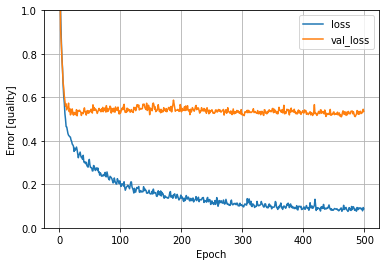

In [28]:
plot_loss(history)

In [29]:
model.save("wine_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: wine_model\assets


In [32]:
test_results = {}
test_results['model'] = model.evaluate(test_features, test_labels)

10/10 [==============================] - 0s 703us/step - loss: 0.5118


In [33]:
pd.DataFrame(test_results, index=['Mean absolute error [quality]']).T

,Mean absolute error [quality]
model,0.511796


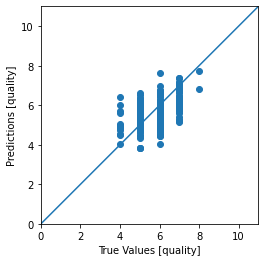

In [35]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [quality]')
plt.ylabel('Predictions [quality]')
lims = [0, 11]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

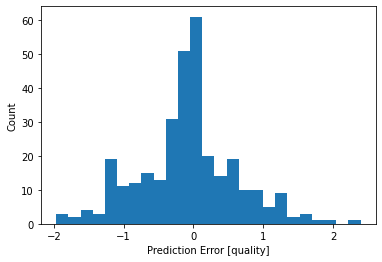

In [36]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [quality]')
_ = plt.ylabel('Count')

In [38]:
model.save('model_wine')

INFO:tensorflow:Assets written to: model_wine\assets
